In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
path = "D:/Important Docs/Knowledge Hut/Machine Learning/Data/Bike-Sharing-Dataset/hour.csv"
dfa = pd.read_csv(path)

In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
dfa.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
dfa.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
dfa.head(7)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2


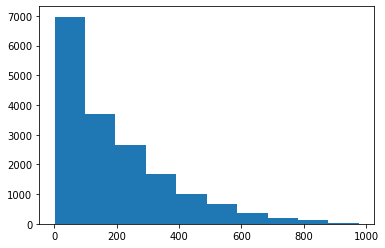

In [7]:
plt.hist(dfa["cnt"])
plt.show()

In [8]:
dfa.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [12]:
# 0-6 early morning --> 4
# 6-12 morning --> 1
# 12-18 noon --> 2
# 18-24 night --> 3

def assign_hour_label(h):
    if h >= 0 and h < 6:
        return 4
    elif h >=6 and h < 12:
        return 1
    elif h >=12 and h < 18:
        return 2
    elif h >=18 and h < 24:
        return 3
    
dfa["time_label"] = dfa["hr"].apply(assign_hour_label)

In [15]:
train = dfa.sample(frac=0.8)

test = dfa.loc[~dfa.index.isin(train.index)]

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
list_cols = list(dfa.columns)

In [21]:
list_cols.remove("cnt")
list_cols.remove("casual")
list_cols.remove("registered")
list_cols.remove("dteday")

In [23]:
model_reg = LinearRegression()
model_reg.fit(train[list_cols], train["cnt"])

LinearRegression()

In [24]:
# MSE
predictions_reg = model_reg.predict(test[list_cols])

mse_reg = np.mean((predictions_reg - test["cnt"])**2)

In [26]:
print(f"mse with linear reg = {mse_reg}")

mse with linear reg = 17708.860454116973


In [30]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(train[list_cols], train["cnt"])

predictions_dt = model_dt.predict(test[list_cols])

mse_dt = np.mean((predictions_dt - test["cnt"])**2)
print(f"mse with dt = {mse_dt}")

mse with dt = 2948.0837169159954


In [36]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(min_samples_leaf=5)
model_dt.fit(train[list_cols], train["cnt"])

predictions_dt = model_dt.predict(test[list_cols])

mse_dt_leaf5 = np.mean((predictions_dt - test["cnt"])**2)
print(f"mse with dt with leaf 5 = {mse_dt_leaf5}")

mse with dt with leaf 5 = 2471.4610448550798


In [52]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(train[list_cols], train["cnt"])

predictions_rf = model_rf.predict(test[list_cols])

mse_dt_rf = np.mean((predictions_rf - test["cnt"])**2)
print(f"mse with rf  = {mse_dt_rf}")

mse with rf  = 1527.5316163693901


In [57]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(min_samples_leaf=2)
model_rf.fit(train[list_cols], train["cnt"])

predictions_rf = model_rf.predict(test[list_cols])

mse_dt_rf_leaf5 = np.mean((predictions_rf - test["cnt"])**2)
print(f"mse with rf with leaf 5 = {mse_dt_rf_leaf5}")

mse with rf with leaf 5 = 1481.8132110316587
